# Rank : 37
# Nickname Kaggle : 6410422003_Pakawut
# Student Code : 6410422003
# Name : Pakawut Kamolrungwarakul
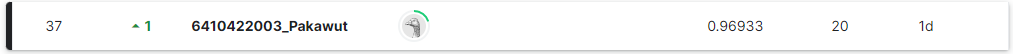

In [1]:
###### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dads6003-in-class-competition/sampleSubmission.csv
/kaggle/input/dads6003-in-class-competition/train.csv
/kaggle/input/dads6003-in-class-competition/test.csv


# Standard scientific Python imports
# Import datasets, classifiers and performance metrics

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Input Train data files

In [3]:
df_train = pd.read_csv("../input/dads6003-in-class-competition/train.csv")

df_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-10.731014,-166.447703,57.634618,5.851483,6.443051,773.535357,-425.516507,19.541551,102333.24180,37.515512,...,1.177903,4531.019914,65.320993,10.856422,42.317769,215.727832,9.922942,194.151039,-4.580311,0
1,-11.357862,-175.583196,61.413742,4.957525,6.022880,592.665369,-154.993322,17.165756,56410.00878,33.667832,...,6.288225,5745.900235,124.629610,19.519498,37.481917,193.590955,10.280823,159.152326,-4.361565,0
2,-19.008191,-266.301983,43.228042,5.173549,5.569678,912.741203,-337.001477,18.362978,37204.35472,24.194495,...,5.241047,5369.285274,136.536890,16.824492,31.761223,195.816664,9.604161,148.690528,-5.322491,1
3,-16.849847,-228.458742,45.440429,6.267129,4.125443,834.109486,-297.096954,16.375756,54967.23130,20.578061,...,2.316119,NaN,118.295834,19.972844,51.722932,210.446677,8.108592,310.539447,-5.205344,0
4,-11.518749,-345.861627,37.470283,6.178874,5.527774,634.255353,-243.072126,16.785630,62397.51981,39.815572,...,5.366404,6161.928292,61.414626,15.990853,51.659323,203.356424,12.552922,241.868249,-4.889072,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-22.976076,-87.741044,71.575697,5.133005,5.005782,374.673090,-231.697183,22.082335,71968.29468,33.312879,...,6.247279,4814.522334,92.784789,20.056762,31.408226,250.550332,10.088208,235.970697,-4.691113,0
7496,-14.769648,-59.981381,71.580937,4.665601,4.794020,926.146773,-158.936881,22.423359,43085.02045,39.211047,...,1.836617,5667.375520,137.550813,15.212581,41.660239,237.096094,8.784662,357.238315,-5.386656,0
7497,-11.506576,-170.005713,73.463259,3.458829,4.817631,628.897187,-323.776913,19.536800,77637.05102,23.025941,...,1.411486,4894.120531,58.662358,18.990424,44.648430,155.672618,9.637743,267.242115,-4.762964,0
7498,-19.096762,-246.575443,20.601422,3.777457,5.002737,966.673241,-274.964688,14.625013,21651.92288,34.475087,...,5.944064,5039.347826,187.884085,16.228964,33.562779,NaN,8.996544,378.392107,-5.637455,0


# Input Test data files

In [4]:
df_test = pd.read_csv("../input/dads6003-in-class-competition/test.csv")

df_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-14.880285,-413.657030,17.037929,5.627481,6.262187,704.164878,-269.815659,13.503896,60805.03782,31.065906,5.625478,5.150013,6282.637653,174.281276,19.959450,32.278906,206.323118,8.337124,232.140628,-5.120450
1,-13.987087,-235.197680,53.670585,4.743702,4.670301,1226.941573,-184.656449,7.034055,55445.68723,15.189238,15.746002,3.880180,3759.028105,32.216142,17.054081,35.934156,191.790254,10.985527,267.024627,-5.200961
2,-11.764850,-192.880170,38.687566,5.606648,4.147060,940.690132,-182.564985,17.218596,31562.61815,34.769586,12.766144,4.885215,6722.719526,181.736690,20.479688,33.809666,166.718488,7.087623,115.762593,-6.080712
3,-10.790193,-204.849932,50.837951,5.934410,5.310772,794.581702,-245.911853,9.936746,47299.76010,25.565751,14.068207,7.156563,5651.188202,127.570137,20.904829,49.857911,139.872041,9.597151,213.574163,-6.355565
4,-17.113392,-141.457819,53.246627,5.939751,5.631022,543.441438,-302.081360,21.861266,66725.53006,34.796947,13.834198,4.743589,5376.558510,119.269139,19.826086,39.903060,311.541001,12.573611,263.709173,-4.329967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-10.748920,-123.090960,66.593207,4.503692,4.425309,829.466831,-107.156688,22.739967,48504.72177,39.160508,11.348713,1.803607,4646.754349,136.808938,15.006916,39.227486,172.957250,10.880483,337.430698,-2.326623
2496,-17.196991,-189.015599,47.387098,4.408258,4.889252,746.303884,-270.304513,20.418374,59596.44138,30.581147,14.030679,2.875333,5833.522235,127.639932,17.594512,40.589086,180.844507,10.381625,299.939691,-3.223933
2497,-15.973066,-119.346381,57.109954,5.069460,4.795335,549.789318,-444.956096,25.128557,82587.29842,26.298068,17.095002,3.336470,5233.826244,71.779085,16.388083,36.826070,217.762141,9.413329,389.496693,-5.481375
2498,-13.978930,-263.721432,44.856753,4.747877,6.416562,964.261050,-240.501426,14.853419,46806.61691,24.743501,12.359627,1.804650,5149.709537,61.357063,9.366483,26.342202,165.728320,6.423645,309.790283,-4.102397


# Check Train data Information

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7391 non-null   float64
 1   x2      7466 non-null   float64
 2   x3      7444 non-null   float64
 3   x4      7407 non-null   float64
 4   x5      7440 non-null   float64
 5   x6      7382 non-null   float64
 6   x7      7419 non-null   float64
 7   x8      7365 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7421 non-null   float64
 10  x11     7483 non-null   float64
 11  x12     7488 non-null   float64
 12  x13     7370 non-null   float64
 13  x14     7376 non-null   float64
 14  x15     7393 non-null   float64
 15  x16     7407 non-null   float64
 16  x17     7375 non-null   float64
 17  x18     7480 non-null   float64
 18  x19     7355 non-null   float64
 19  x20     7374 non-null   float64
 20  y       7500 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

# Check Missing Train data

In [6]:
print(df_train.isnull().sum())

x1     109
x2      34
x3      56
x4      93
x5      60
x6     118
x7      81
x8     135
x9       0
x10     79
x11     17
x12     12
x13    130
x14    124
x15    107
x16     93
x17    125
x18     20
x19    145
x20    126
y        0
dtype: int64


# Check Test data Information

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2500 non-null   float64
 1   x2      2500 non-null   float64
 2   x3      2500 non-null   float64
 3   x4      2500 non-null   float64
 4   x5      2500 non-null   float64
 5   x6      2500 non-null   float64
 6   x7      2500 non-null   float64
 7   x8      2500 non-null   float64
 8   x9      2500 non-null   float64
 9   x10     2500 non-null   float64
 10  x11     2500 non-null   float64
 11  x12     2500 non-null   float64
 12  x13     2500 non-null   float64
 13  x14     2500 non-null   float64
 14  x15     2500 non-null   float64
 15  x16     2500 non-null   float64
 16  x17     2500 non-null   float64
 17  x18     2500 non-null   float64
 18  x19     2500 non-null   float64
 19  x20     2500 non-null   float64
dtypes: float64(20)
memory usage: 390.8 KB


# Check Missing Test data

In [8]:
print(df_test.isnull().sum())

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
dtype: int64


# Filling the missing data with 0

In [9]:
#Fill with 0
df_train = df_train.fillna(0)

# Drop Missing data

In [10]:
#Drop NA
#df_train = df_train.dropna()

# Filling the missing data with Mean

In [11]:
# Mean
# df_train['x1'] = df_train['x1'].fillna(df_train['x1'].mean())
# df_train['x2'] = df_train['x2'].fillna(df_train['x2'].mean())
# df_train['x3'] = df_train['x3'].fillna(df_train['x3'].mean())
# df_train['x4'] = df_train['x4'].fillna(df_train['x4'].mean())
# df_train['x5'] = df_train['x5'].fillna(df_train['x5'].mean())
# df_train['x6'] = df_train['x6'].fillna(df_train['x6'].mean())
# df_train['x7'] = df_train['x7'].fillna(df_train['x7'].mean())
# df_train['x8'] = df_train['x8'].fillna(df_train['x8'].mean())
# df_train['x9'] = df_train['x9'].fillna(df_train['x9'].mean())
# df_train['x10'] = df_train['x10'].fillna(df_train['x10'].mean())
# df_train['x11'] = df_train['x11'].fillna(df_train['x11'].mean())
# df_train['x12'] = df_train['x12'].fillna(df_train['x12'].mean())
# df_train['x13'] = df_train['x13'].fillna(df_train['x13'].mean())
# df_train['x14'] = df_train['x14'].fillna(df_train['x14'].mean())
# df_train['x15'] = df_train['x15'].fillna(df_train['x15'].mean())
# df_train['x16'] = df_train['x16'].fillna(df_train['x16'].mean())
# df_train['x17'] = df_train['x17'].fillna(df_train['x17'].mean())
# df_train['x18'] = df_train['x18'].fillna(df_train['x18'].mean())
# df_train['x19'] = df_train['x19'].fillna(df_train['x19'].mean())
# df_train['x20'] = df_train['x20'].fillna(df_train['x20'].mean())

# Filling the missing data with Mode

In [12]:
# Mode
# df_train['x1'] = df_train['x1'].fillna(df_train['x1'].mode()[0])
# df_train['x2'] = df_train['x2'].fillna(df_train['x2'].mode()[0])
# df_train['x3'] = df_train['x3'].fillna(df_train['x3'].mode()[0])
# df_train['x4'] = df_train['x4'].fillna(df_train['x4'].mode()[0])
# df_train['x5'] = df_train['x5'].fillna(df_train['x5'].mode()[0])
# df_train['x6'] = df_train['x6'].fillna(df_train['x6'].mode()[0])
# df_train['x7'] = df_train['x7'].fillna(df_train['x7'].mode()[0])
# df_train['x8'] = df_train['x8'].fillna(df_train['x8'].mode()[0])
# df_train['x9'] = df_train['x9'].fillna(df_train['x9'].mode()[0])
# df_train['x10'] = df_train['x10'].fillna(df_train['x10'].mode()[0])
# df_train['x11'] = df_train['x11'].fillna(df_train['x11'].mode()[0])
# df_train['x12'] = df_train['x12'].fillna(df_train['x12'].mode()[0])
# df_train['x13'] = df_train['x13'].fillna(df_train['x13'].mode()[0])
# df_train['x14'] = df_train['x14'].fillna(df_train['x14'].mode()[0])
# df_train['x15'] = df_train['x15'].fillna(df_train['x15'].mode()[0])
# df_train['x16'] = df_train['x16'].fillna(df_train['x16'].mode()[0])
# df_train['x17'] = df_train['x17'].fillna(df_train['x17'].mode()[0])
# df_train['x18'] = df_train['x18'].fillna(df_train['x18'].mode()[0])
# df_train['x19'] = df_train['x19'].fillna(df_train['x19'].mode()[0])
# df_train['x20'] = df_train['x20'].fillna(df_train['x20'].mode()[0])

# Filling the missing data with Median

In [13]:
# Median
# df_train['x1'] = df_train['x1'].fillna(df_train['x1'].median())
# df_train['x2'] = df_train['x2'].fillna(df_train['x2'].median())
# df_train['x3'] = df_train['x3'].fillna(df_train['x3'].median())
# df_train['x4'] = df_train['x4'].fillna(df_train['x4'].median())
# df_train['x5'] = df_train['x5'].fillna(df_train['x5'].median())
# df_train['x6'] = df_train['x6'].fillna(df_train['x6'].median())
# df_train['x7'] = df_train['x7'].fillna(df_train['x7'].median())
# df_train['x8'] = df_train['x8'].fillna(df_train['x8'].median())
# df_train['x9'] = df_train['x9'].fillna(df_train['x9'].median())
# df_train['x10'] = df_train['x10'].fillna(df_train['x10'].median())
# df_train['x11'] = df_train['x11'].fillna(df_train['x11'].median())
# df_train['x12'] = df_train['x12'].fillna(df_train['x12'].median())
# df_train['x13'] = df_train['x13'].fillna(df_train['x13'].median())
# df_train['x14'] = df_train['x14'].fillna(df_train['x14'].median())
# df_train['x15'] = df_train['x15'].fillna(df_train['x15'].median())
# df_train['x16'] = df_train['x16'].fillna(df_train['x16'].median())
# df_train['x17'] = df_train['x17'].fillna(df_train['x17'].median())
# df_train['x18'] = df_train['x18'].fillna(df_train['x18'].median())
# df_train['x19'] = df_train['x19'].fillna(df_train['x19'].median())
# df_train['x20'] = df_train['x20'].fillna(df_train['x20'].median())

# Filling the missing data with Forward value

In [14]:
# Forward fill
# df_train = df_train.fillna(method='ffill')

# Filling the missing data with Backward value

In [15]:
# Backward fill
# df_train = df_train.fillna(method='bfill')

# Check Statistical Distributions of data by Boxplot

<AxesSubplot:>

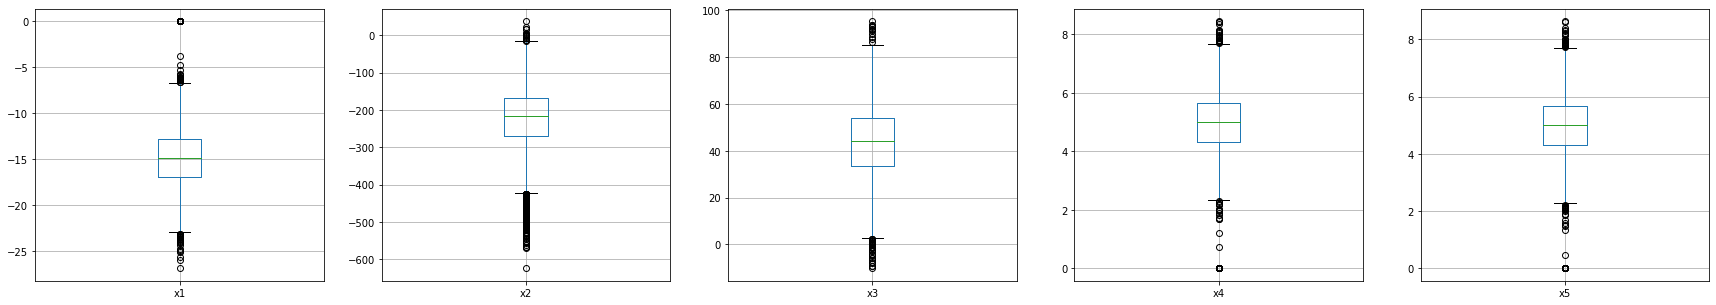

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5 ,figsize=(30,5))

df_train.boxplot(column=['x1'], ax=ax1)
df_train.boxplot(column=['x2'], ax=ax2)
df_train.boxplot(column=['x3'], ax=ax3)
df_train.boxplot(column=['x4'], ax=ax4)
df_train.boxplot(column=['x5'], ax=ax5)

<AxesSubplot:>

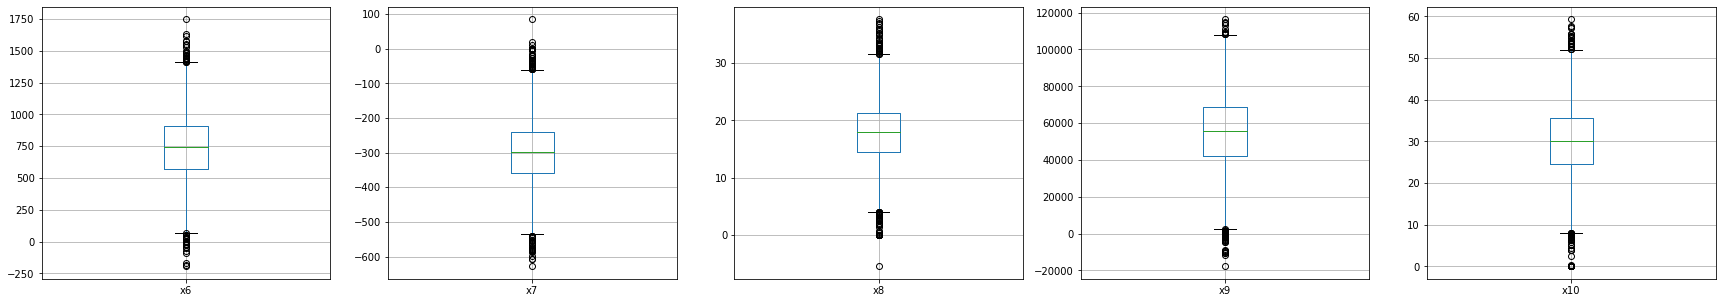

In [17]:
fig, (ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 5 ,figsize=(30,5))

df_train.boxplot(column=['x6'], ax=ax6)
df_train.boxplot(column=['x7'], ax=ax7)
df_train.boxplot(column=['x8'], ax=ax8)
df_train.boxplot(column=['x9'], ax=ax9)
df_train.boxplot(column=['x10'], ax=ax10)

<AxesSubplot:>

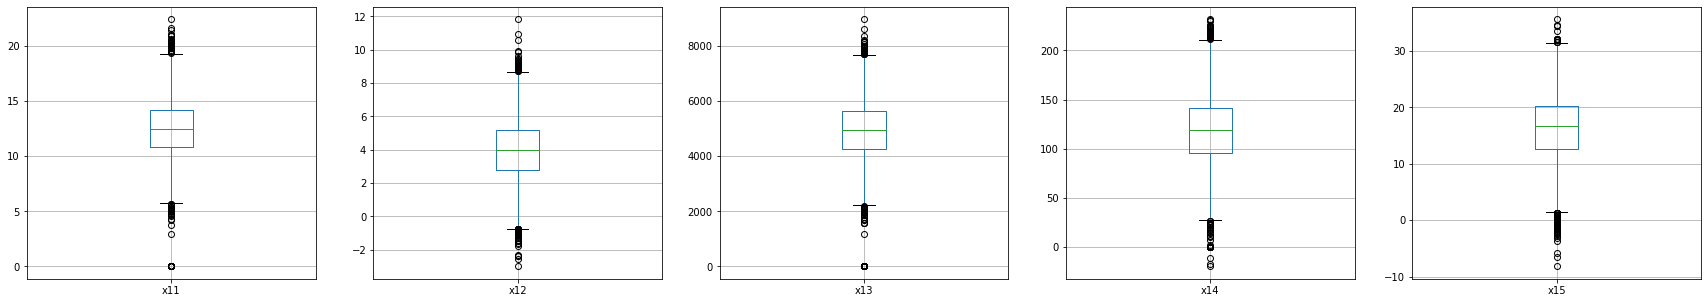

In [18]:
fig, (ax11, ax12, ax13, ax14, ax15) = plt.subplots(1, 5 ,figsize=(30,5))

df_train.boxplot(column=['x11'], ax=ax11)
df_train.boxplot(column=['x12'], ax=ax12)
df_train.boxplot(column=['x13'], ax=ax13)
df_train.boxplot(column=['x14'], ax=ax14)
df_train.boxplot(column=['x15'], ax=ax15)

<AxesSubplot:>

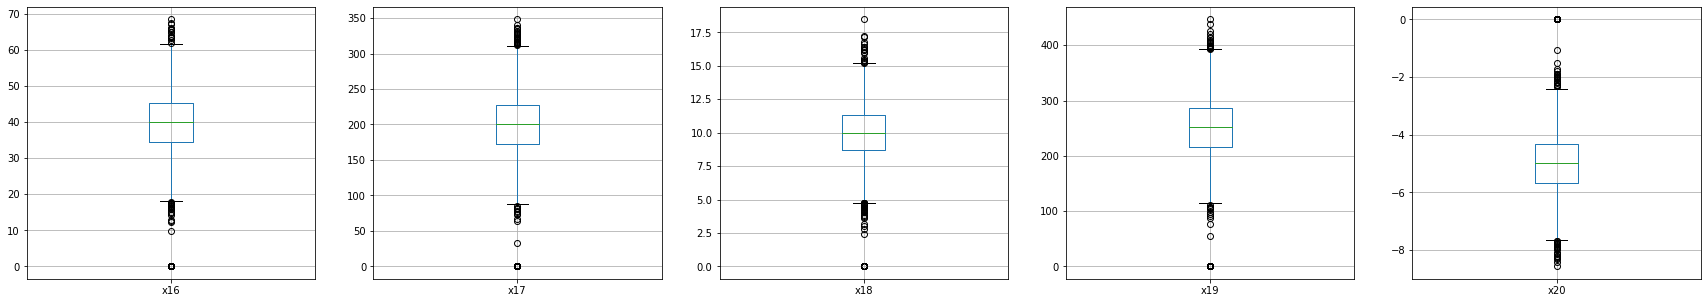

In [19]:
fig, (ax16, ax17, ax18, ax19, ax20) = plt.subplots(1, 5 ,figsize=(30,5))

df_train.boxplot(column=['x16'], ax=ax16)
df_train.boxplot(column=['x17'], ax=ax17)
df_train.boxplot(column=['x18'], ax=ax18)
df_train.boxplot(column=['x19'], ax=ax19)
df_train.boxplot(column=['x20'], ax=ax20)

# Check Statistical Distributions of data by Plotly

In [20]:
fig_x1 = px.histogram(df_train, x ="x1" , title='Distribution by x1')
fig_x1.show()

fig_x2 = px.histogram(df_train, x ="x2" , title='Distribution by x2')
fig_x2.show()

fig_x3 = px.histogram(df_train, x ="x3" , title='Distribution by x3')
fig_x3.show()

fig_x4 = px.histogram(df_train, x ="x4" , title='Distribution by x4')
fig_x4.show()

fig_x5 = px.histogram(df_train, x ="x5" , title='Distribution by x5')
fig_x5.show()

fig_x6 = px.histogram(df_train, x ="x6" , title='Distribution by x6')
fig_x6.show()

fig_x7 = px.histogram(df_train, x ="x7" , title='Distribution by x7')
fig_x7.show()

fig_x8 = px.histogram(df_train, x ="x8" , title='Distribution by x8')
fig_x8.show()

fig_x9 = px.histogram(df_train, x ="x9" , title='Distribution by x9')
fig_x9.show()

fig_x10 = px.histogram(df_train, x ="x10" , title='Distribution by x10')
fig_x10.show()

fig_x11 = px.histogram(df_train, x ="x11" , title='Distribution by x11')
fig_x11.show()

fig_x12 = px.histogram(df_train, x ="x12" , title='Distribution by x12')
fig_x12.show()

fig_x13 = px.histogram(df_train, x ="x13" , title='Distribution by x13')
fig_x13.show()

fig_x14 = px.histogram(df_train, x ="x14" , title='Distribution by x14')
fig_x14.show()

fig_x15 = px.histogram(df_train, x ="x15" , title='Distribution by x15')
fig_x15.show()

fig_x16 = px.histogram(df_train, x ="x16" , title='Distribution by x16')
fig_x16.show()

fig_x17 = px.histogram(df_train, x ="x17" , title='Distribution by x17')
fig_x17.show()

fig_x18 = px.histogram(df_train, x ="x18" , title='Distribution by x18')
fig_x18.show()

fig_x19 = px.histogram(df_train, x ="x19" , title='Distribution by x19')
fig_x19.show()

fig_x20 = px.histogram(df_train, x ="x20" , title='Distribution by x20')
fig_x20.show()

In [21]:
fig_y = px.histogram(df_train, x ="y" , title='Risk Distribution by Gender' , color ="y" )
fig_y.show()

# All data columns are Normal Distribution

# Select X data

In [22]:
X = df_train.iloc[:, 0:20].values

X

array([[ -10.73101398, -166.4477027 ,   57.6346177 , ...,    9.92294244,
         194.1510391 ,   -4.58031069],
       [ -11.35786191, -175.5831956 ,   61.4137415 , ...,   10.28082344,
         159.1523264 ,   -4.36156535],
       [ -19.00819084, -266.3019825 ,   43.22804193, ...,    9.60416124,
         148.6905281 ,   -5.32249103],
       ...,
       [ -11.50657612, -170.0057127 ,   73.46325937, ...,    9.63774277,
         267.2421152 ,   -4.76296373],
       [ -19.09676221, -246.5754434 ,   20.60142206, ...,    8.99654413,
         378.392107  ,   -5.6374547 ],
       [ -11.21577621, -273.782103  ,   40.98712597, ...,    9.67170045,
         243.1556533 ,   -6.08894036]])

# Select y data

In [23]:
y = df_train.iloc[:,20].values

y

array([0, 0, 1, ..., 0, 0, 0])

# Select Test data

In [24]:
data_test = df_test.iloc[:, 0:20].values

data_test

array([[ -14.88028526, -413.6570298 ,   17.03792882, ...,    8.33712381,
         232.1406283 ,   -5.12045029],
       [ -13.9870871 , -235.1976804 ,   53.67058509, ...,   10.98552726,
         267.0246267 ,   -5.20096146],
       [ -11.76484956, -192.8801697 ,   38.68756647, ...,    7.08762314,
         115.7625933 ,   -6.08071211],
       ...,
       [ -15.9730665 , -119.3463808 ,   57.10995411, ...,    9.41332859,
         389.4966933 ,   -5.4813747 ],
       [ -13.97892983, -263.7214325 ,   44.85675326, ...,    6.42364489,
         309.7902834 ,   -4.10239746],
       [ -12.3037289 , -184.8530073 ,   50.87219017, ...,    4.87893587,
         273.709428  ,   -3.49016076]])

# Split X and y Data to trian and test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y,random_state=345)

# Trian and Test data

In [26]:
clf=RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred= clf.predict(X_test)

y_pred

array([1, 1, 0, ..., 0, 0, 1])

# Crossvalidation & Evaluation Model

Accuracy: 0.9662222222222222
[[1652   30]
 [  46  522]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1682
           1       0.95      0.92      0.93       568

    accuracy                           0.97      2250
   macro avg       0.96      0.95      0.95      2250
weighted avg       0.97      0.97      0.97      2250



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



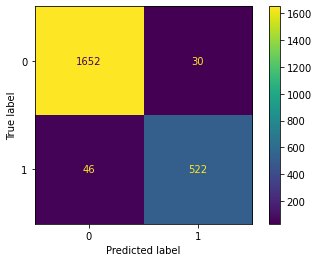

In [27]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

# Predict data

In [28]:
y_Random = clf.predict(data_test)

y_Random

array([1, 0, 0, ..., 0, 1, 0])

# Generate Output

In [29]:
# output
# fields = ['id','Expected']
# submission = pd.DataFrame()
# id = list(range(1,2501))
# submission['id']=pd.Series(id)
# submission['Expected']=pd.Series(y_Random)
# submission.to_csv('6_DADS6003_submission.csv', index=False)